# Linear regression

In [4]:
#imports
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [5]:
# read data into a DataFrame
data = pd.read_csv('winequality-red.csv', sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
# print the shape of the DataFrame
data.shape

(1599, 12)

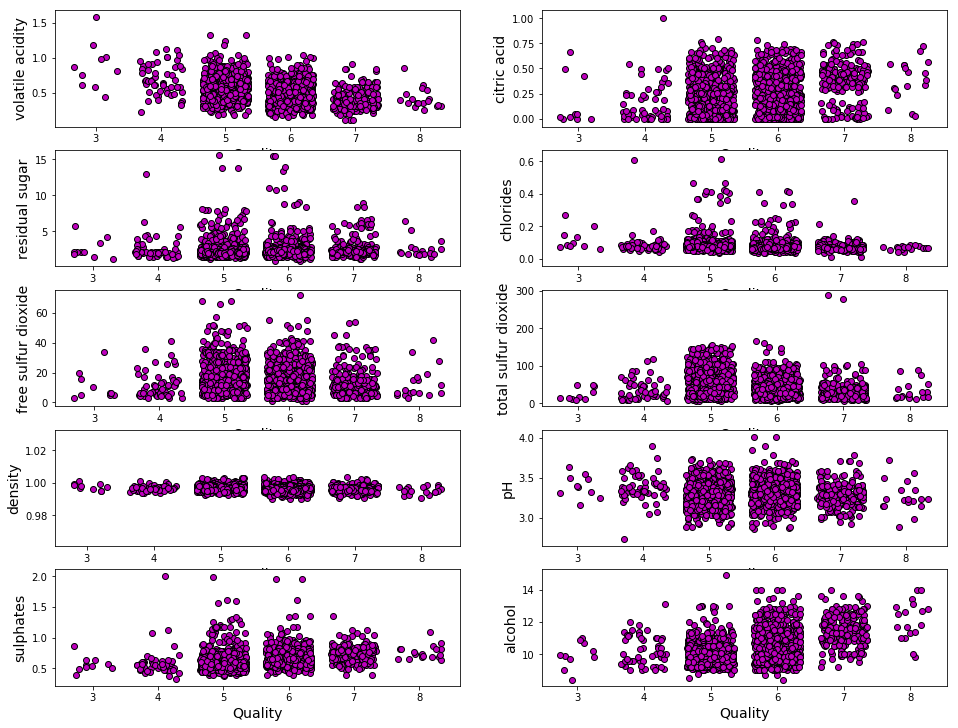

In [25]:
def jitter(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))
plt.figure(figsize = (16,15))
for i in range (1, 11):
    plt.subplot(6, 2, i)
    plt.scatter(jitter(data['quality']), data.ix[:, i], color= 'm', edgecolors="black")
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel(str(data.columns[i]), fontsize=14)

In [26]:
def run():
    # Step # 1 - Extract data
    points = np.genfromtxt('winequality-red.csv', delimiter = ';')
    
    # Step # 2 - Define hyperparameters
    
    ## Learning rate
    learning_rate = 0.0001
    
    ## Coefficients y = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5) + w6*x6 + w7*x7 + w8*x8 + w9*x9 + w10*x10 + w11*x11
    init_w0 = 0
    init_w1 = 0
    init_w2 = 0
    init_w3 = 0
    init_w4 = 0
    init_w5 = 0
    init_w6 = 0
    init_w7 = 0
    init_w8 = 0
    init_w9 = 0
    init_w10 = 0
    init_w11 = 0

    
    ## number of iterations
    num_iterations = 10000
    
    # Step 3 - model training
    
    print(
        '''Start learning at w0 = {0}, w1 = {1}, w2 = {2}, w3 = {3}, w4 = {4}, w5 = {5}, w6 = {6}, 
        w7 = {7}, w8 = {8}, w9 = {9}, w10 = {10}, w11 = {11} error = {12}'''.format(
            init_w0, init_w1, init_w2, init_w3, init_w4, init_w5, init_w6, init_w7, init_w8, init_w9, 
                          init_w10, init_w11,
            compute_error(init_w0, init_w1, init_w2, init_w3, init_w4, init_w5, init_w6, init_w7, init_w8, init_w9, 
                          init_w10, init_w11, points)
        )
    )
    
    w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = gradient_descent(init_w0, init_w1, init_w2, init_w3, init_w4, init_w5, init_w6, init_w7, init_w8, init_w9, init_w10, init_w11, points, learning_rate, num_iterations)
    
    print(
        '''End learning at at w0 = {0}, w1 = {1}, w2 = {2}, w3 = {3}, w4 = {4}, w5 = {5}, w6 = {6}, 
        w7 = {7}, w8 = {8}, w9 = {9}, w10 = {10}, w11 = {11} error = {12}'''.format(
            w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11,
            compute_error(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, points)
        )
    )
    
    return w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11


def compute_error(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, points):
    '''
        Computes Error = 1/N * sum((y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5) + w6*x6 + w7*x7 + w8*x8 +
        w9*x9 + w10*x10 + w11*x11))^2)
    '''
    N = len(points)
    error = 0
    
    for i in range (1, N):
        x1 = points[i, 0]
        x2 = points[i, 1]
        x3 = points[i, 2]
        x4 = points[i, 3]
        x5 = points[i, 4]
        x6 = points[i, 5]
        x7 = points[i, 6]
        x8 = points[i, 7]
        x9 = points[i, 8]
        x10 = points[i, 9]
        x11 = points[i, 10]
        y = points[i, 11]
        error += (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 + w10*x10 
                  + w11*x11))**2
        
    return error / N

def gradient_descent(starting_w0, starting_w1, starting_w2, starting_w3, starting_w4, starting_w5, starting_w6, 
                     starting_w7, starting_w8, starting_w9, starting_w10, starting_w11, points, learning_rate, 
                     num_iterations):
    '''
        Performs gradient step num_iterations times
        in order to find optimal a, b values
    '''
    w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = starting_w0, starting_w1, starting_w2, starting_w3, starting_w4, starting_w5, starting_w6, starting_w7, starting_w8, starting_w9, starting_w10, starting_w11
    
    for i in range (num_iterations):
        w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = gradient_step(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, points, learning_rate)
    return w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11

def gradient_step(current_w0, current_w1, current_w2, current_w3, current_w4, current_w5, current_w6, 
                     current_w7, current_w8, current_w9, current_w10, current_w11, points, learning_rate):
    '''
        Updates a and b in antigradient direction
        with given learning_rate
    '''
    w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = current_w0, current_w1, current_w2, current_w3, current_w4, current_w5, current_w6, current_w7, current_w8, current_w9, current_w10, current_w11

    w0_grad = 0
    w1_grad = 0
    w2_grad = 0
    w3_grad = 0
    w4_grad = 0
    w5_grad = 0
    w6_grad = 0
    w7_grad = 0
    w8_grad = 0
    w9_grad = 0 
    w10_grad = 0
    w11_grad = 0
    
    N = len(points)
    
    for i in range (1, N):
        x1 = points[i, 0]
        x2 = points[i, 1]
        x3 = points[i, 2]
        x4 = points[i, 3]
        x5 = points[i, 4]
        x6 = points[i, 5]
        x7 = points[i, 6]
        x8 = points[i, 7]
        x9 = points[i, 8]
        x10 = points[i, 9]
        x11 = points[i, 10]
        y = points[i, 11]
        
        w0_grad += -(2 / N) * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w1_grad += -(2 / N) * x1 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w2_grad += -(2 / N) * x2 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w3_grad += -(2 / N) * x3 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w4_grad += -(2 / N) * x4 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w5_grad += -(2 / N) * x5 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w6_grad += -(2 / N) * x6 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w7_grad += -(2 / N) * x7 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w8_grad += -(2 / N) * x8 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w9_grad += -(2 / N) * x9 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w10_grad += -(2 / N) * x10 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        w11_grad += -(2 / N) * x11 * (y - (w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 + w8*x8 + w9*x9 
                                  + w10*x10 + w11*x11))
        
        
    w0 = current_w0 - learning_rate * w0_grad
    w1 = current_w1 - learning_rate * w1_grad
    w2 = current_w2 - learning_rate * w2_grad
    w3 = current_w3 - learning_rate * w3_grad
    w4 = current_w4 - learning_rate * w4_grad
    w5 = current_w5 - learning_rate * w5_grad
    w6 = current_w6 - learning_rate * w6_grad
    w7 = current_w7 - learning_rate * w7_grad
    w8 = current_w8 - learning_rate * w8_grad
    w9 = current_w9 - learning_rate * w9_grad
    w10 = current_w10 - learning_rate * w10_grad
    w11 = current_w11 - learning_rate * w11_grad
        
    return w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11

In [27]:
w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = run()

Start learning at w0 = 0, w1 = 0, w2 = 0, w3 = 0, w4 = 0, w5 = 0, w6 = 0, 
        w7 = 0, w8 = 0, w9 = 0, w10 = 0, w11 = 0 error = 32.39625
End learning at at w0 = 0.04413804835895052, w1 = 0.09782350976639125, w2 = -0.03731253093274172, w3 = 0.01361692303314766, w4 = -0.008102824012432853, w5 = 0.001079153381219651, w6 = 0.007534783542854267, 
        w7 = -0.0024886412982644073, w8 = 0.043709832125633605, w9 = 0.143254876819564, w10 = 0.06904085289077985, w11 = 0.4069352309948117 error = 0.4829681651720473


# Plot Cost funstion

In [ ]:
def plot_decorator(f):
    points = np.genfromtxt('data.csv', delimiter=';')
    
    return lambda w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11: f(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, points)


cost = plot_decorator(compute_error)

In [24]:
points = np.genfromtxt('data.csv', delimiter=';')
for i in range (1, N):
    x1 = points[i, 0]
    x2 = points[i, 1]
    x3 = points[i, 2]
    x4 = points[i, 3]
    x5 = points[i, 4]
    x6 = points[i, 5]
    x7 = points[i, 6]
    x8 = points[i, 7]
    x9 = points[i, 8]
    x10 = points[i, 9]
    x11 = points[i, 10]
    y = points[i, 11]

plt.xlim(0, 80)
plt.ylim(0, 150)
plt.scatter(x1, y)

params = np.linspace(0, 150, 10)

plt.plot(params, a * params + b)

plt.show()

OSError: data.csv not found.

ValueError: scatter requires and x and y column

In [76]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

In [47]:
# Reading Data
data = pd.read_csv('winequality-red.csv', sep=';')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
# Collecting X and Y
X = data['alcohol'].values
Y = data['quality'].values

In [49]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.360841765335 1.874974887


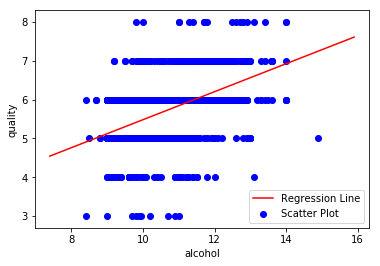

In [50]:
# Plotting Values and Regression Line

max_x = np.max(X) + 1
min_x = np.min(X) - 1

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='r', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='b', label='Scatter Plot')

plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()


In [51]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

0.70991832324


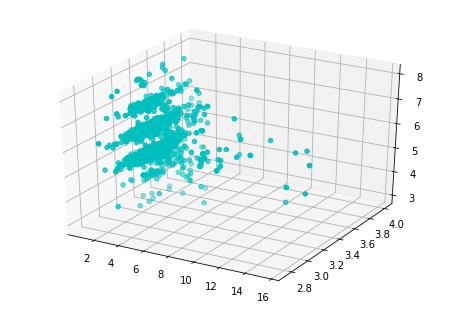

In [56]:
sugar = data['residual sugar'].values
pH = data['pH'].values
quality = data['quality'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sugar, pH, quality, color='c')
plt.show()

In [67]:
s = len(sugar)
x0 = np.ones(s)
X = np.array([x0, sugar, pH]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(quality)
alpha = 0.0001

In [68]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [69]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

16.2082551595


In [70]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    s = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [71]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[ 0.57383002  0.03687219  1.49704793]
0.363155568716


In [72]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [73]:
Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))

0.852238896926


In [77]:
# Create a column from the list
data['Predictions'] = Y_pred
display(data)
    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predictions
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5.898525
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5.460251
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5.539012
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,5.374559
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5.898525
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,5.894838
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,5.573084
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,5.693069
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,5.677655
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,5.813861
